### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [52]:
data = pd.read_csv('data/coupons.csv')

In [53]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [54]:
data.shape

(12684, 26)

In [55]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [56]:
# Note that we have missing values in some of the columns

#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189


data_cars=data.car.value_counts()
print(data_cars)
print("=============================================")

# Based on the data above, drop the cars column entirely since its not giving much meaningful information
data_clean = data.dropna(axis='columns', thresh = 250)

# Drop other rows that are containing NULLS
data_clean = data_clean.dropna()
data_clean.info()


Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          1207

In [57]:
# Looks like age contains some random objects. Lets clean it and put in a different column

data_clean['age_clean']=data_clean['age'].str.replace('below21', 'below20', regex=True)
data_clean['age_clean']=data_clean['age_clean'].str.replace('[a-zA-Z]', '',regex=True)
data_clean['age_clean']=data_clean['age_clean'].astype(int)

data_clean_age=data_clean.age_clean.value_counts()
data_clean_age

21    2537
26    2399
31    1925
50    1732
36    1253
41    1065
46     664
20     504
Name: age_clean, dtype: int64

In [58]:
data_clean = data_clean.rename(columns = {'passanger':'passenger'})
data_clean

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,21
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,21
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,26
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,26
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,26
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,1,0,1,0,26


In [59]:
data_clean.nunique()
#Interesting to note that there are unique counts of 25 for Occupation.

destination              3
passenger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
age_clean                8
dtype: int64

In [60]:
data_clean.describe(include=object)


,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,5970,6969,9601,3078,3816,6760,6199,2537,4831,4219,1814,1919,4934,3298,4502,5163,5859


In [61]:
# Examine some of the data and their counts

#   Column                Non-Null Count  Dtype 
#---  ------                --------------  ----- 
# 0   destination           12079 non-null  object
# 1   passenger             12079 non-null  object
# 2   weather               12079 non-null  object
# 3   temperature           12079 non-null  int64 
# 4   time                  12079 non-null  object
# 5   coupon                12079 non-null  object
# 6   expiration            12079 non-null  object
# 7   gender                12079 non-null  object
# 8   age                   12079 non-null  object
# 9   maritalStatus         12079 non-null  object
# 10  has_children          12079 non-null  int64 
# 11  education             12079 non-null  object
# 12  occupation            12079 non-null  object
# 13  income                12079 non-null  object
# 14  Bar                   12079 non-null  object
# 15  CoffeeHouse           12079 non-null  object
# 16  CarryAway             12079 non-null  object
# 17  RestaurantLessThan20  12079 non-null  object
# 18  Restaurant20To50      12079 non-null  object
# 19  toCoupon_GEQ5min      12079 non-null  int64 
# 20  toCoupon_GEQ15min     12079 non-null  int64 
# 21  toCoupon_GEQ25min     12079 non-null  int64 
# 22  direction_same        12079 non-null  int64 
# 23  direction_opp         12079 non-null  int64 
# 24  Y                     12079 non-null  int64 

data_destination=data_clean.destination.value_counts()
print(data_destination)
print("=============================================")


data_coupon=data_clean.coupon.value_counts()
print(data_coupon)
print("=============================================")


data_Bar=data_clean.Bar.value_counts()
print(data_Bar)
print("=============================================")


data_occupation=data_clean.occupation.value_counts()
print(data_occupation)
print("=============================================")


data_passenger=data_clean.passenger.value_counts()
print(data_passenger)
print("=============================================")


data_income=data_clean.income.value_counts()
print(data_income)
print("=============================================")

data_CoffeeHouse=data_clean.CoffeeHouse.value_counts()
print(data_CoffeeHouse)
print("=============================================")

data_CarryAway=data_clean.CarryAway.value_counts()
print(data_CarryAway)
print("=============================================")

data_RestaurantLessThan20=data_clean.RestaurantLessThan20.value_counts()
print(data_RestaurantLessThan20)
print("=============================================")

data_Restaurant20To50=data_clean.Restaurant20To50.value_counts()
print(data_Restaurant20To50)
print("=============================================")

No Urgent Place    5970
Home               3085
Work               3024
Name: destination, dtype: int64
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64
never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: Bar, dtype: int64
Unemployed                                   1814
Student                                      1497
Computer & Mathematical                      1368
Sales & Related                              1072
Education&Training&Library                    855
Management                                    772
Office & Administrative Support               617
Arts Design Entertainment Sports & Media      564
Business & Financial                          516
Retired                                       473
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners 

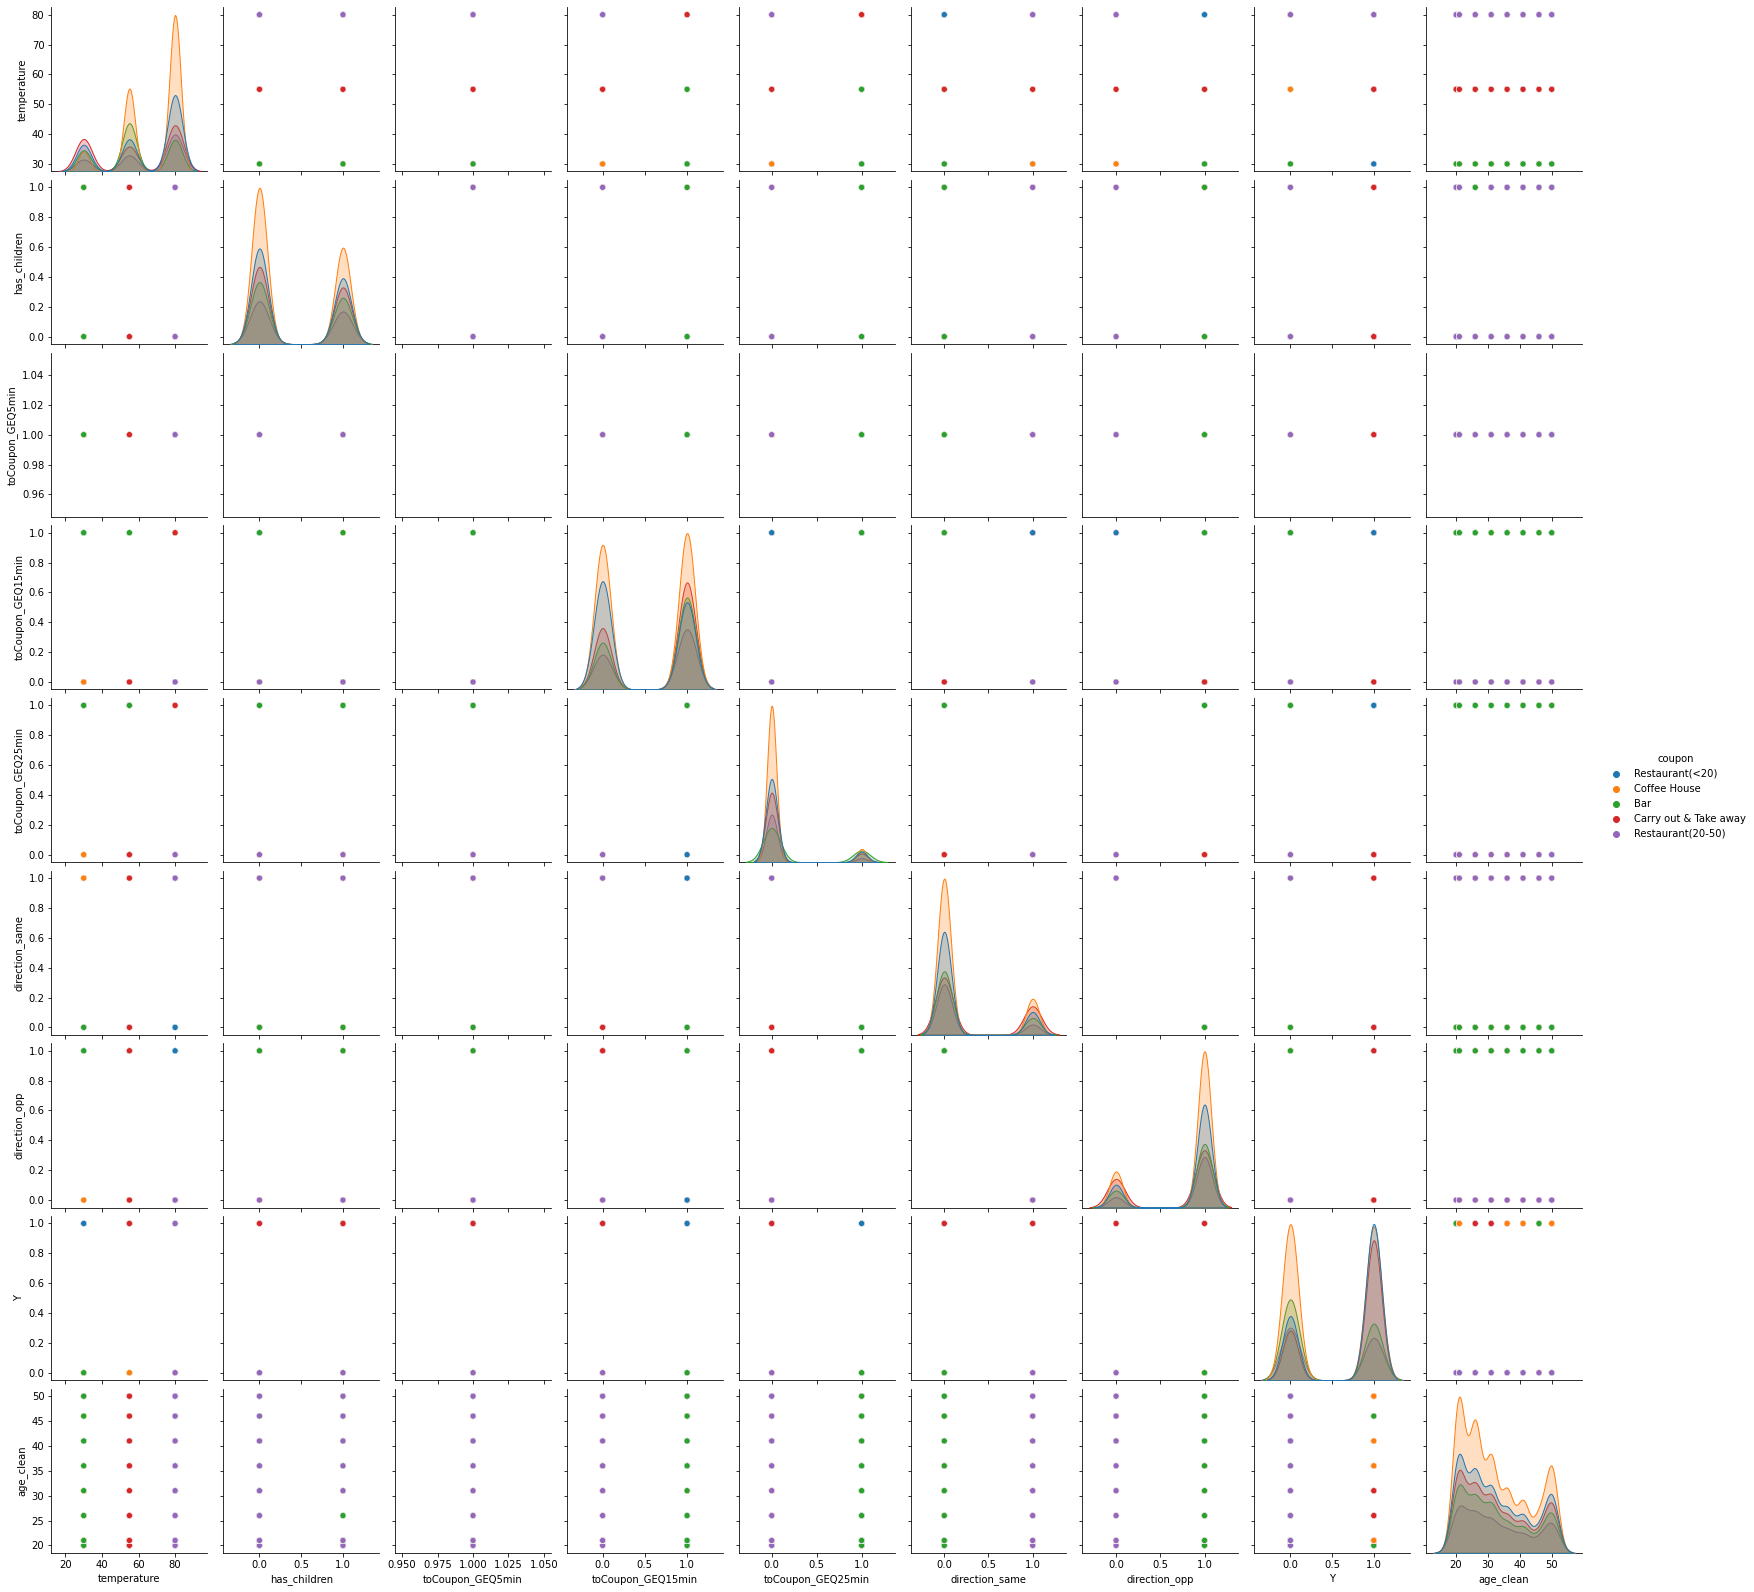

In [62]:
sns.pairplot(data_clean, hue ='coupon')
plt.show()

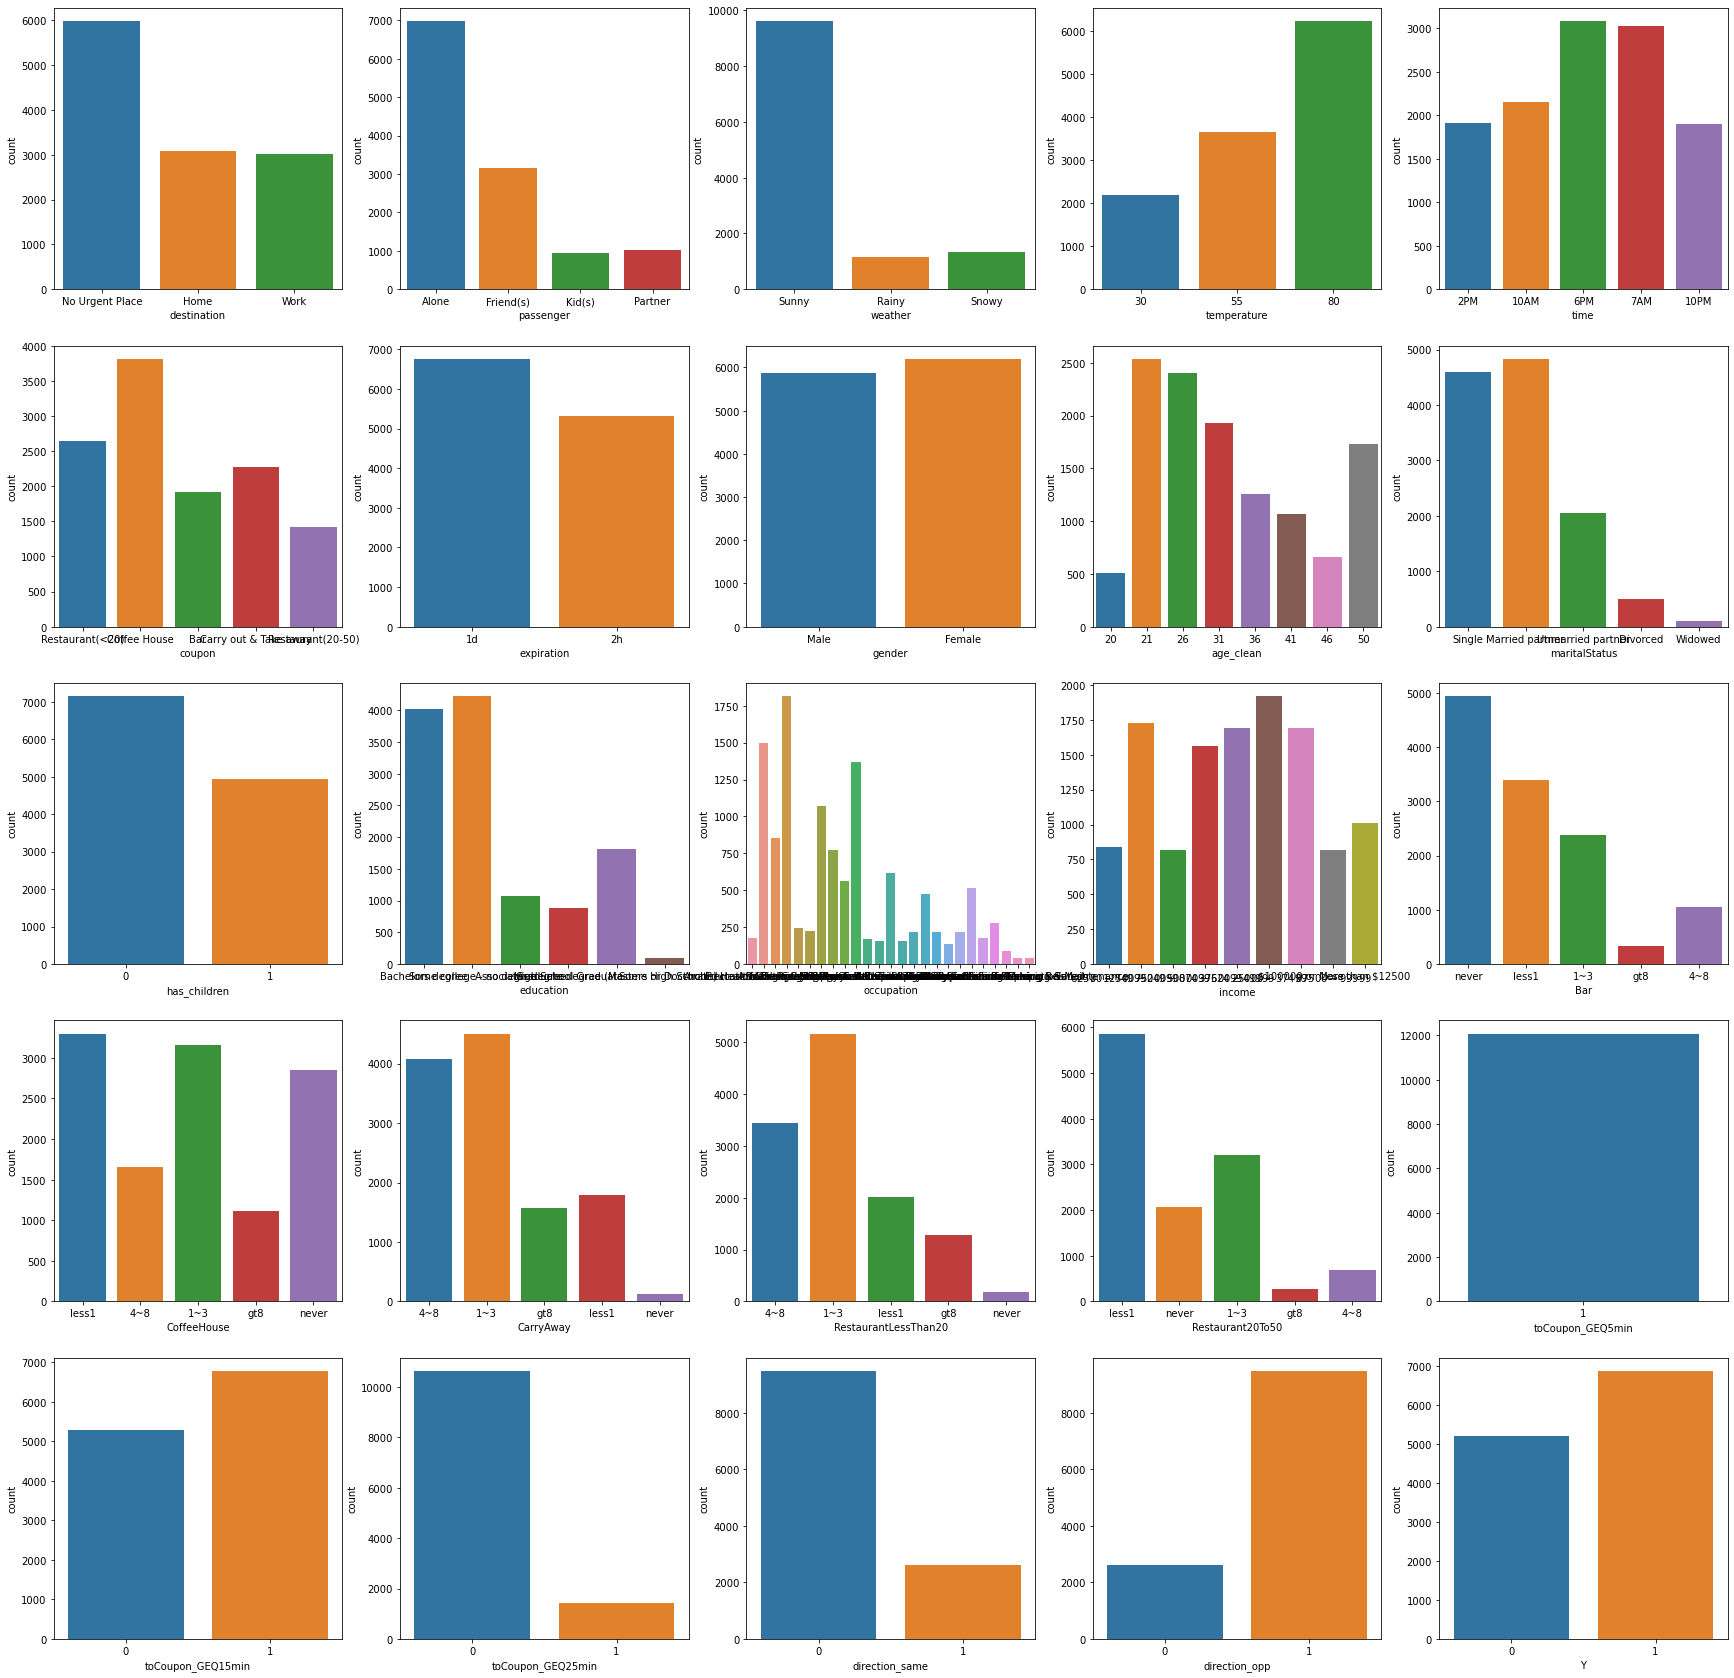

In [63]:
#destination              3
#passenger                4
#weather                  3
#temperature              3
#time                     5
#coupon                   5
#expiration               2
#gender                   2
#age                      8
#maritalStatus            5
#has_children             2
#education                6
#occupation              25
#income                   9
#Bar                      5
#CoffeeHouse              5
#CarryAway                5
#RestaurantLessThan20     5
#Restaurant20To50         5
#toCoupon_GEQ5min         1
#toCoupon_GEQ15min        2
#toCoupon_GEQ25min        2
#direction_same           2
#direction_opp            2
#Y                        2
#age_clean                8

fig, axes = plt.subplots(5, 5, figsize=(30, 30))
 
sns.countplot(ax=axes[0, 0], data=data_clean, x='destination')
sns.countplot(ax=axes[0, 1], data=data_clean, x='passenger')
sns.countplot(ax=axes[0, 2], data=data_clean, x='weather')
sns.countplot(ax=axes[0, 3], data=data_clean, x='temperature')
sns.countplot(ax=axes[0, 4], data=data_clean, x='time')

sns.countplot(ax=axes[1, 0], data=data_clean, x='coupon')
sns.countplot(ax=axes[1, 1], data=data_clean, x='expiration')
sns.countplot(ax=axes[1, 2], data=data_clean, x='gender')
sns.countplot(ax=axes[1, 3], data=data_clean, x='age_clean')
sns.countplot(ax=axes[1, 4], data=data_clean, x='maritalStatus')

sns.countplot(ax=axes[2, 0], data=data_clean, x='has_children')
sns.countplot(ax=axes[2, 1], data=data_clean, x='education')
sns.countplot(ax=axes[2, 2], data=data_clean, x='occupation')
sns.countplot(ax=axes[2, 3], data=data_clean, x='income')
sns.countplot(ax=axes[2, 4], data=data_clean, x='Bar')

sns.countplot(ax=axes[3, 0], data=data_clean, x='CoffeeHouse')
sns.countplot(ax=axes[3, 1], data=data_clean, x='CarryAway')
sns.countplot(ax=axes[3, 2], data=data_clean, x='RestaurantLessThan20')
sns.countplot(ax=axes[3, 3], data=data_clean, x='Restaurant20To50')
sns.countplot(ax=axes[3, 4], data=data_clean, x='toCoupon_GEQ5min')

sns.countplot(ax=axes[4, 0], data=data_clean, x='toCoupon_GEQ15min')
sns.countplot(ax=axes[4, 1], data=data_clean, x='toCoupon_GEQ25min')
sns.countplot(ax=axes[4, 2], data=data_clean, x='direction_same')
sns.countplot(ax=axes[4, 3], data=data_clean, x='direction_opp')
sns.countplot(ax=axes[4, 4], data=data_clean, x='Y')

fig.savefig("images/overall_distr.png")


Based on the above plot there is no issue in data set. We observe that  toCoupon_GEQ5min has one unique value only containing 1. For eg: Output of 5 random values from that field has ~

`{{data_clean.toCoupon_GEQ5min.sample(5)}}`

4. What proportion of the total observations chose to accept the coupon? 



In [64]:
# Count the values of 0 & 1 in the dataset
accept_coupon_counts=data_clean.Y.value_counts()
accept_coupon_counts

1    6877
0    5202
Name: Y, dtype: int64

In [65]:
#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion=accept_coupon_counts[1]/(accept_coupon_counts[0]+accept_coupon_counts[1])
accept_coupon_proportion

0.5693352098683666

#  Proportion of the total observations who chose to accept the coupon

Proportion of patrons who chose to accept the coupon is `{{accept_coupon_proportion}}`

5. Use a bar plot to visualize the `coupon` column.

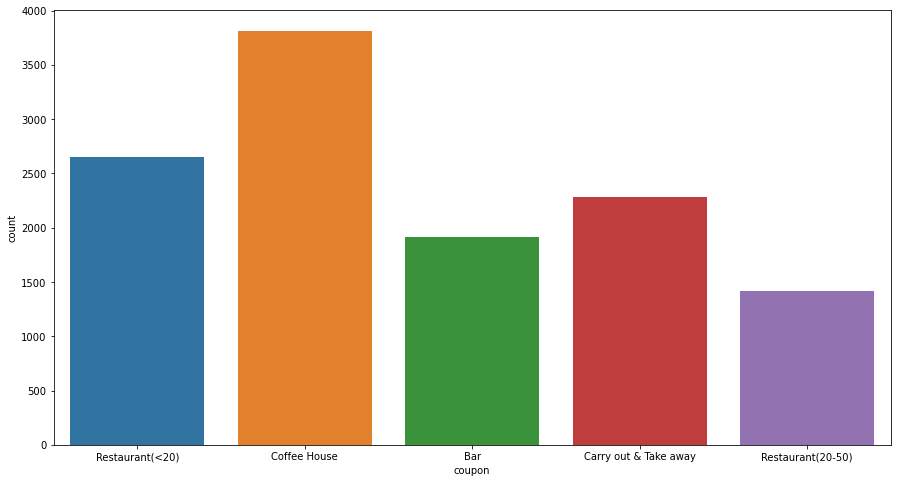

In [66]:
plt.figure(figsize=(15,8))
sns.countplot (data=data_clean,x='coupon').figure.savefig("images/coupon_distribution.png")

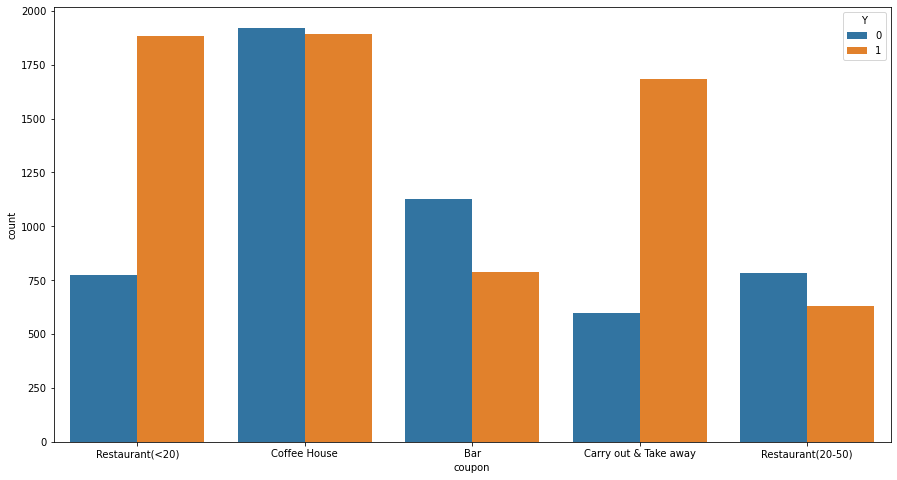

In [67]:
plt.figure(figsize=(15,8))
sns.countplot (data=data_clean,x='coupon',hue="Y").figure.savefig("images/coupon_distribution_byacceptance.png")


6. Use a histogram to visualize the temperature column.

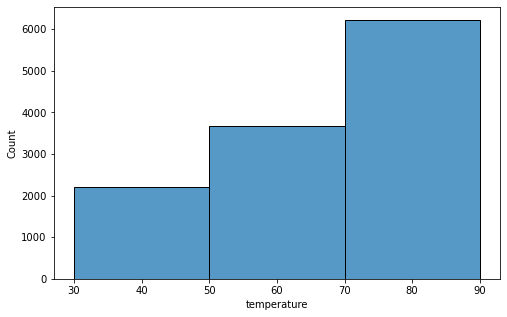

In [68]:
plt.figure(figsize=(8,5))
sns.histplot (data=data_clean, x='temperature',binwidth=20).figure.savefig("images/temperature_distribution.png")

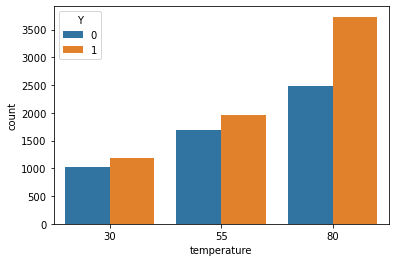

In [69]:
# Lets see how the temperature data looks for coupon acceptances
sns.countplot(data=data_clean, x='temperature', hue='Y').figure.savefig("images/temperature_distribution_by_couponacceptance.png")

It looks the chances of coupons getting redeemed are higher when tempeatures are higher (in 80's)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [70]:
data_bar_coupons = data_clean.query('coupon == "Bar"')
data_bar_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,21
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,46
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,46


2. What proportion of bar coupons were accepted?


In [71]:
# Count the values of 0 & 1 in the dataset
accept_coupon_counts_bar=data_bar_coupons.Y.value_counts()
accept_coupon_counts_bar

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar=accept_coupon_counts_bar[1]/(accept_coupon_counts_bar[0]+accept_coupon_counts_bar[1])
accept_coupon_proportion_bar

0.41191845269210664

### Proportion of bar coupons were accepted: {{accept_coupon_proportion_bar}}

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


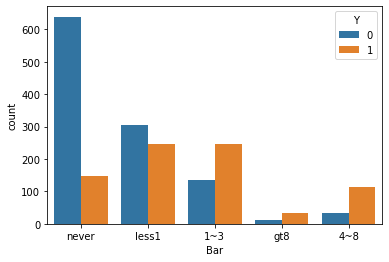

In [72]:
sns.countplot(data=data_bar_coupons, x='Bar', hue='Y').figure.savefig("images/coupon_acceptance_rate_barcoupons.png")


In [73]:
Bar_less_than_1=["never","less1"]
Bar_less_than_3=["1~3"]

#Discard data in Bar less than one bucket
data_bar_coupons_less_3 = data_bar_coupons.query('Bar not in @Bar_less_than_1' )

# Count data for less than 3
data_bar_coupons_less_3 = data_bar_coupons_less_3.query('Bar in @Bar_less_than_3' )


data_bar_coupons_less_3.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,0,1,1,21
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,1,1,0,1,0,21
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26


In [74]:
#Double check if we still have some other counts
data_bar_coupons_less_3.Bar.value_counts()

1~3    379
Name: Bar, dtype: int64

<AxesSubplot:xlabel='Bar', ylabel='count'>

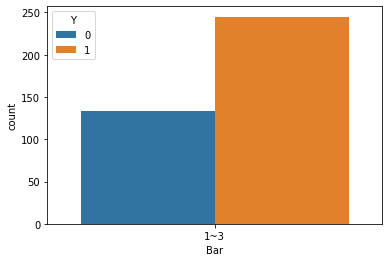

In [75]:
sns.countplot(data=data_bar_coupons_less_3, x='Bar', hue='Y')


In [76]:

# Count the values of 0 & 1 in the dataset
accept_coupon_counts_bar_less_3=data_bar_coupons_less_3.Y.value_counts()
accept_coupon_counts_bar_less_3



1    245
0    134
Name: Y, dtype: int64

In [77]:
#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar_less_3=accept_coupon_counts_bar_less_3[1]/(accept_coupon_counts_bar_less_3[0]+accept_coupon_counts_bar_less_3[1])
accept_coupon_proportion_bar_less_3


0.6464379947229552

In [78]:

data_bar_coupons_morethan_3 = data_bar_coupons.query('Bar in ("4~8","gt8")')
data_bar_coupons_morethan_3.head()



,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,26
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,1,0,1,26
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,1,1,0,1,1,26
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,1,0,0,0,1,0,31
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,1,0,0,1,0,1,31


In [79]:

# Count the values of 0 & 1 in the dataset
accept_coupon_counts_bar_gt_3=data_bar_coupons_morethan_3.Y.value_counts()
accept_coupon_counts_bar_gt_3


1    147
0     46
Name: Y, dtype: int64

In [80]:

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar_gt_3=accept_coupon_counts_bar_gt_3[1]/(accept_coupon_counts_bar_gt_3[0]+accept_coupon_counts_bar_gt_3[1])
accept_coupon_proportion_bar_gt_3


0.7616580310880829

### Conclusion #3

Acceptance rate between those who went to a bar 3 or fewer times a month is {{accept_coupon_proportion_bar_less_3}}. For partons who went more the acceptance rate is {{accept_coupon_proportion_bar_gt_3}}

This shows that patrons who go to bar more translated to a greater coupon claim ratio. In other words, as a patron if you go to bar frequently, you are more likely to go to bar to claim a coupon you received.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [81]:

data_bar_coupons_morethan_1 = data_bar_coupons.query('Bar in ("1~3","4~8","gt8")')
data_bar_coupons_morethan_1.head()


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,0,1,1,21
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,1,1,0,1,0,21
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26


In [82]:
data_bar_coupons_morethan_1_age_gt25=data_bar_coupons_morethan_1.query('age_clean >= 25')
data_bar_coupons_morethan_1_age_gt25

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,1,1,0,1,1,26
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,26
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,1,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,0,0,1,1,26
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,0,0,1,1,26
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,0,0,1,1,26
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,0,0,1,1,26


In [83]:
# Count the values of 0 & 1 in the dataset
accept_coupon_counts_bar_gt_1_age25Plus=data_bar_coupons_morethan_1_age_gt25.Y.value_counts()
accept_coupon_counts_bar_gt_1_age25Plus

1    278
0    125
Name: Y, dtype: int64

In [84]:

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar_gt_1_age25Plus=accept_coupon_counts_bar_gt_1_age25Plus[1]/(accept_coupon_counts_bar_gt_1_age25Plus[0]+accept_coupon_counts_bar_gt_1_age25Plus[1])
accept_coupon_proportion_bar_gt_1_age25Plus

0.6898263027295285

### Conclusion #4

When comparing the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others we observe a delta of approximate 29%, which means that we have a strong correlation for the group over age 25 and who go to bar once and acceptance rate of coupon

- Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25: {{accept_coupon_proportion_bar_gt_1_age25Plus}}

- All others patrons who accepted bar coupon: {{accept_coupon_proportion_bar}}

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [85]:
data_bar_coupons_morethan_1_pass_notkid = data_bar_coupons_morethan_1.query('passenger != "Kid(s)"')
data_bar_coupons_morethan_1_pass_notkid

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,0,1,1,21
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,1,1,0,1,0,21
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,1,0,1,0,26
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,0,21


In [86]:
data_bar_coupons_morethan_1_pass_notkid_occup = data_bar_coupons_morethan_1_pass_notkid.query('occupation not in "Farming Fishing & Forestry"')
data_bar_coupons_morethan_1_pass_notkid_occup

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,0,1,1,21
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,1,1,0,1,0,21
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,1,0,1,0,26
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,0,21


In [87]:
#Check if our query commands are working

print(data_bar_coupons_morethan_1.passenger.value_counts())
print("=============================================")

print(data_bar_coupons.occupation.value_counts())
print("=============================================")

print(data_bar_coupons_morethan_1.occupation.value_counts())
print("=============================================")

print(data_bar_coupons_morethan_1_pass_notkid.passenger.value_counts())
print("=============================================")

print(data_bar_coupons_morethan_1_pass_notkid.occupation.value_counts())
print("=============================================")

print(data_bar_coupons_morethan_1_pass_notkid_occup.occupation.value_counts())
print("=============================================")


Alone        341
Friend(s)    116
Partner       73
Kid(s)        42
Name: passenger, dtype: int64
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Serv

In [88]:
# Count the values of 0 & 1 in the dataset
accept_coupon_morethan_1_pass_notkid_occup=data_bar_coupons_morethan_1_pass_notkid_occup.Y.value_counts()
accept_coupon_morethan_1_pass_notkid_occup

1    376
0    154
Name: Y, dtype: int64

In [89]:

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_morethan_1_pass_notkid_occup=accept_coupon_morethan_1_pass_notkid_occup[1]/(accept_coupon_morethan_1_pass_notkid_occup[0]+accept_coupon_morethan_1_pass_notkid_occup[1])
accept_coupon_proportion_morethan_1_pass_notkid_occup

0.7094339622641509

# Conclusion #5

Lets compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

The acceptance rate for patrons meeting all of these conditions is {{accept_coupon_proportion_morethan_1_pass_notkid_occup}}

When comparing this to overall acceptance ratio of  all others patrons who accepted bar coupon: {{accept_coupon_proportion_bar}} this slice is a good subset and shows good correlation.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [90]:
data_bar_coupons_morethan_1_nokid_widowed=data_bar_coupons_morethan_1.query('passenger != "Kid(s)"' and 'maritalStatus != "Widowed"' )
data_bar_coupons_morethan_1_nokid_widowed

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,0,1,1,21
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,1,1,0,1,0,21
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,1,0,1,0,26
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,0,21


In [91]:
# Count the values of 0 & 1 in the dataset
accept_coupon_data_bar_coupons_morethan_1_nokid_widowed=data_bar_coupons_morethan_1_nokid_widowed.Y.value_counts()
accept_coupon_data_bar_coupons_morethan_1_nokid_widowed

1    392
0    180
Name: Y, dtype: int64

In [92]:

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar_coupons_morethan_1_nokid_widowed=accept_coupon_data_bar_coupons_morethan_1_nokid_widowed[1]/(accept_coupon_data_bar_coupons_morethan_1_nokid_widowed[0]+accept_coupon_data_bar_coupons_morethan_1_nokid_widowed[1])
accept_coupon_proportion_bar_coupons_morethan_1_nokid_widowed

0.6853146853146853

In [93]:
data_bar_coupons_morethan_1_under30=data_bar_coupons_morethan_1.query('age_clean <= 30')
data_bar_coupons_morethan_1_under30

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,0,1,1,21
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,0,0,1,0,1,21
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,less1,1~3,1,1,1,0,1,0,21
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,26
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,1,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,4~8,4~8,less1,1,1,1,0,1,0,26
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,1,21
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,gt8,4~8,1~3,1,1,0,0,1,0,21


In [94]:
# Count the values of 0 & 1 in the dataset
accept_coupon_data_bar_coupons_morethan_1_under30=data_bar_coupons_morethan_1_under30.Y.value_counts()
accept_coupon_data_bar_coupons_morethan_1_under30

1    236
0     92
Name: Y, dtype: int64

In [95]:

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar_coupons_morethan_1_under30=accept_coupon_data_bar_coupons_morethan_1_under30[1]/(accept_coupon_data_bar_coupons_morethan_1_under30[0]+accept_coupon_data_bar_coupons_morethan_1_under30[1])
accept_coupon_proportion_bar_coupons_morethan_1_under30

0.7195121951219512

In [96]:
Income_Less_Than_50l=["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"]
Rest_more_than4=["4~8","gt8" ]
data_bar_coupons_morethan_1_rest_morethan4_incomeless50K=data_bar_coupons_morethan_1.query('income in @Income_Less_Than_50l and Restaurant20To50 in @Rest_more_than4 and RestaurantLessThan20 in @Rest_more_than4')
data_bar_coupons_morethan_1_rest_morethan4_incomeless50K

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_clean
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,26
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,1,0,1,26
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,1,1,0,1,1,26
1613,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,26
1624,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Single,...,gt8,gt8,gt8,1,0,0,1,0,1,26
1628,Work,Alone,Sunny,55,7AM,Bar,1d,Female,26,Single,...,gt8,gt8,gt8,1,1,1,0,1,1,26
2525,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,50plus,Married partner,...,4~8,gt8,gt8,1,1,0,0,1,1,50
2529,Home,Alone,Sunny,55,6PM,Bar,1d,Male,50plus,Married partner,...,4~8,gt8,gt8,1,0,0,1,0,1,50
2533,Work,Alone,Sunny,55,7AM,Bar,1d,Male,50plus,Married partner,...,4~8,gt8,gt8,1,1,1,0,1,1,50
3072,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,26


In [97]:
# Count the values of 0 & 1 in the dataset
accept_coupon_data_bar_coupons_morethan_1_rest_morethan4_incomeless50K=data_bar_coupons_morethan_1_rest_morethan4_incomeless50K.Y.value_counts()
accept_coupon_data_bar_coupons_morethan_1_rest_morethan4_incomeless50K

1    36
0     8
Name: Y, dtype: int64

In [98]:

#Proportion of the total observations chose to accept the coupon can be calculated by doing 
# ratio of people with Y=1 divided by total counts
accept_coupon_proportion_bar_coupons_morethan_1_rest_morethan4_incomeless50K=accept_coupon_data_bar_coupons_morethan_1_rest_morethan4_incomeless50K[1]/(accept_coupon_data_bar_coupons_morethan_1_rest_morethan4_incomeless50K[0]+accept_coupon_data_bar_coupons_morethan_1_rest_morethan4_incomeless50K[1])
accept_coupon_proportion_bar_coupons_morethan_1_rest_morethan4_incomeless50K

0.8181818181818182

# Conclusion #6

## Comparing data in various scenarios

As seen in the table below, patrons who went to bar more than once and under age of 30 are closely corelated to patrons who went to bars more than once a month, had passengers that were not a kid, and were not widowed. On the other side, patrons going cheap restaurants more than 4 times a month and income is less than 50K have slightly chance of redeeming the bar coupons. This shows that patrons who earn less probably value the coupon more (10% more) and more likely to acccept it

### Table showing comparision of various data points we collected in the exercise#6

| Condition | Additional Condition | Acceptance proportion |
|---------- |-------------- |--------------|
| Bar coupons accepted | bars more than once a month, had passengers that were not a kid, and were not widowed | {{accept_coupon_proportion_bar_coupons_morethan_1_nokid_widowed}}| 
| Bar coupons accepted | bars more than once a month and are under the age of 30 | {{accept_coupon_proportion_bar_coupons_morethan_1_under30}}| 
| Bar coupons accepted | cheap restaurants more than 4 times a month and income is less than 50K. | {{accept_coupon_proportion_bar_coupons_morethan_1_rest_morethan4_incomeless50K}}| 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis

## Conclusion #7

Based on the table below, we observe that acceptance proportion goes up if the patrons go to bar more often. Also, people with lower income value the coupon more and are almost twice as likely to accept it. 

### Table showing comparision of various data points we collected in the examples above

| Condition | Additional Condition | Acceptance proportion |
|---------- |-------------- |--------------|
| Bar coupons accepted | - | {{accept_coupon_proportion_bar}}| 
| Bar coupons accepted | Went to bar less than 3 times | {{accept_coupon_proportion_bar_less_3}}| 
| Bar coupons accepted | Went to bar more than 3 times | {{accept_coupon_proportion_bar_gt_3}}|
| Bar coupons accepted | Went to bar more than once and Age 25+ | {{accept_coupon_proportion_bar_gt_1_age25Plus}}| 
| Bar coupons accepted | Went to bars more than once a month with passengers that were not a kid and had occupations other than farming, fishing, or forestry | {{accept_coupon_proportion_morethan_1_pass_notkid_occup}}| 
| Bar coupons accepted | bars more than once a month, had passengers that were not a kid, and were not widowed | {{accept_coupon_proportion_bar_coupons_morethan_1_nokid_widowed}}| 
| Bar coupons accepted | bars more than once a month and are under the age of 30 | {{accept_coupon_proportion_bar_coupons_morethan_1_under30}}| 
| Bar coupons accepted | cheap restaurants more than 4 times a month and income is less than 50K. | {{accept_coupon_proportion_bar_coupons_morethan_1_rest_morethan4_incomeless50K}}| 




 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Please see the notebook "CarryOut_Analysis" for details on this